# Eurovision Song Contest
https://eurovision.tv/

### Background
Inspired by Italy's famous <b>Sanremo Music Festival</b>, a song competition was organised by the European Broadcasting Company to replicate its popularity through many countries competing against each other. Running annually nonstop since 1956 (save 2020 during COVID), the competition has seen the inclusion of nations far from European shores such as Israel and Australia.

The competition, despite it popularity, has endured criticism of its format and content. Besides current rules favouring bigger countries, its ranking system has seen certain countries forming voting blocks with each other. The music has also been criticised as run-of-the-mill pop songs where choreography is more important than musical talent as well.

In [1]:
import polars as pl
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = [file for file in os.listdir("./eurovision_data")]

eurovision_data = pl.DataFrame()

for file in files:
    df = pl.read_csv("./eurovision_data/"+file)
    eurovision_data = pl.concat([eurovision_data, df])
    
eurovision_data.write_csv("eurovision_data.csv", separator=",")

### Important references
https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

This will allow us to read all files in the directory.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

This will allow us to join the datasheets that we have just read.

In [3]:
eurovisiondata = pl.read_csv("eurovision_data.csv")
eurovisiondata

Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
i64,str,str,str,str,str,i64,str
1957,"""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x"""
1957,"""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null
1957,"""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null
1957,"""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null
1957,"""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null
…,…,…,…,…,…,…,…
2019,"""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null
2019,"""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null
2019,"""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x"""


We need to add more columns to the dataframe before we answer questions, so what columns do we already have?

In [4]:
eurovisiondata.columns

['Year',
 '(semi-) final',
 'Edition',
 'Jury or Televoting',
 'From country',
 'To country',
 'Points      ',
 'Duplicate']

The <b>Points</b> column name has blank spaces that needs to be removed.

In [5]:
eurovisiondata.columns = [col.strip() for col in eurovisiondata.columns]
eurovisiondata.columns

['Year',
 '(semi-) final',
 'Edition',
 'Jury or Televoting',
 'From country',
 'To country',
 'Points',
 'Duplicate']

We need to add two more columns: <b>Decade</b> and <b>Century</b>.

In [6]:
eurovisiondata = eurovisiondata.select(
    pl.col('Year').cast(pl.String),
    pl.col('(semi-) final'),
    pl.col('Edition'),
    pl.col('Jury or Televoting'),
    pl.col('From country'),
    pl.col('To country'),
    pl.col('Points'),
    pl.col('Duplicate')
)
eurovisiondata

Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate
str,str,str,str,str,str,i64,str
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null
"""1957""","""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null
…,…,…,…,…,…,…,…
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x"""


In [7]:
eurovisiondata = eurovisiondata.with_columns(
    pl.lit(eurovisiondata['Year'].str.head(3)+'0').alias('Decade')
)
eurovisiondata

Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade
str,str,str,str,str,str,i64,str,str
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x""","""1950"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null,"""1950"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null,"""1950"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null,"""1950"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null,"""1950"""
…,…,…,…,…,…,…,…,…
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null,"""2010"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null,"""2010"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x""","""2010"""


In [8]:
eurovisiondata = eurovisiondata.with_columns(
    pl.lit(eurovisiondata['Year'].str.head(2)+'00').alias('Century')
)
eurovisiondata

Year,(semi-) final,Edition,Jury or Televoting,From country,To country,Points,Duplicate,Decade,Century
str,str,str,str,str,str,i64,str,str,str
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x""","""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null,"""1950""","""1900"""
…,…,…,…,…,…,…,…,…,…
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null,"""2010""","""2000"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null,"""2010""","""2000"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x""","""2010""","""2000"""


Just in case, are all the country names consistent over time?

In [9]:
f_unique = eurovisiondata['From country'].unique()
print(sorted([land for land in f_unique]))

['Albania', 'Andorra', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherands', 'The Netherlands', 'Turkey', 'Ukraine', 'United Kingdom', 'Yugoslavia']


This shows the dataframe has three entries for <b>Macedonia</b>: <i>F.Y.R. Macedonia</i>, <i>Macedonia</i>, and <i>North Macedonia</i>. We also see a spelling error that gives us <i>The Netherlands</i> and <i>The Netherands</i> that we have to change that as well. Let's see if this is the case for <i>To country</i> as well.

In [10]:
t_unique = eurovisiondata['To country'].unique()
print(sorted([land for land in t_unique]))

['Albania', 'Andorra', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Turkey', 'Ukraine', 'United Kingdom', 'Yugoslavia']


There are also three different entries for <b>Macedonia</b> here just as above.

In [11]:
eurovisiondata = eurovisiondata.rename({'From country': 'fCountry'})
eurovisiondata = eurovisiondata.rename({'To country': 'tCountry'})
eurovisiondata

Year,(semi-) final,Edition,Jury or Televoting,fCountry,tCountry,Points,Duplicate,Decade,Century
str,str,str,str,str,str,i64,str,str,str
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x""","""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null,"""1950""","""1900"""
…,…,…,…,…,…,…,…,…,…
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null,"""2010""","""2000"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null,"""2010""","""2000"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x""","""2010""","""2000"""


In [12]:
eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('fCountry') == 'F.Y.R. Macedonia')
    .then(pl.lit('North Macedonia'))
    .otherwise(pl.col('fCountry'))
    .alias('fCountry')
)

eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('fCountry') == 'Macedonia')
    .then(pl.lit('North Macedonia'))
    .otherwise(pl.col('fCountry'))
    .alias('fCountry')
)

eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('fCountry') == 'The Netherlands')
    .then(pl.lit('Netherlands'))
    .otherwise(pl.col('fCountry'))
    .alias('fCountry')
)

eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('fCountry') == 'The Netherands')
    .then(pl.lit('Netherlands'))
    .otherwise(pl.col('fCountry'))
    .alias('fCountry')
)

eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('tCountry') == 'F.Y.R. Macedonia')
    .then(pl.lit('North Macedonia'))
    .otherwise(pl.col('tCountry'))
    .alias('tCountry')
)

eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('tCountry') == 'Macedonia')
    .then(pl.lit('North Macedonia'))
    .otherwise(pl.col('tCountry'))
    .alias('tCountry')
)

eurovisiondata = eurovisiondata.with_columns(
    pl.when(pl.col('tCountry') == 'The Netherlands')
    .then(pl.lit('Netherlands'))
    .otherwise(pl.col('tCountry'))
    .alias('tCountry')
)
eurovisiondata

Year,(semi-) final,Edition,Jury or Televoting,fCountry,tCountry,Points,Duplicate,Decade,Century
str,str,str,str,str,str,i64,str,str,str
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x""","""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null,"""1950""","""1900"""
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null,"""1950""","""1900"""
…,…,…,…,…,…,…,…,…,…
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null,"""2010""","""2000"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null,"""2010""","""2000"""
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x""","""2010""","""2000"""


Let's see if all the names are consistent now.

In [13]:
f_unique = eurovisiondata['fCountry'].unique()
print(sorted([land for land in f_unique]))
print(len(f_unique))

['Albania', 'Andorra', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Yugoslavia']
52


In [14]:
t_unique = eurovisiondata['tCountry'].unique()
print(sorted([land for land in t_unique]))
print(len(t_unique))

['Albania', 'Andorra', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Morocco', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Serbia & Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Yugoslavia']
52


They are! The numbers match as well. Now let's start answering some questions!

#### Which countries are the top five countries in points per year? per decade? per century? overall?

Because semi-finals were introduced later, we have to remove them so the dataframe only reflects the points during the final round.

In [15]:
eurovisiondata['Points'].sum()

137531

In [16]:
eurovisionfinal = eurovisiondata.filter(pl.col('(semi-) final') == 'f')
eurovisionfinal['Points'].sum()

90401

Now our dataframe only counts the points in the final round.

In [17]:
eurovisionfinal1986 = eurovisionfinal.filter(pl.col('Year') == '1986')
euro_points_1986 = eurovisionfinal1986.group_by(['Year', 'tCountry']).agg(pl.sum('Points'))
euro_points_1986.sort('Points', descending=True).head(5)

Year,tCountry,Points
str,str,i64
"""1986""","""Belgium""",176
"""1986""","""Switzerland""",140
"""1986""","""Luxembourg""",117
"""1986""","""Ireland""",96
"""1986""","""Sweden""",78


In [18]:
eurovisionfinal1980s = eurovisionfinal.filter(pl.col('Decade') == '1980')
euro_points_1980s = eurovisionfinal1980s.group_by(['tCountry']).agg(pl.sum('Points'))
euro_points_1980s.sort('Points', descending=True).head(5)

tCountry,Points
str,i64
"""Germany""",951
"""United Kingdom""",945
"""Ireland""",893
"""Sweden""",828
"""Switzerland""",769


In [19]:
eurovisionfinal1900s = eurovisionfinal.filter(pl.col('Century') == '1900')
euro_points_1900s = eurovisionfinal1900s.group_by(['tCountry']).agg(pl.sum('Points'))
euro_points_1900s.sort('Points', descending=True).head(5)

tCountry,Points
str,i64
"""United Kingdom""",3209
"""Ireland""",2841
"""France""",2377
"""Germany""",2081
"""Sweden""",2059


In [20]:
euro_points_overall = eurovisionfinal.group_by(['tCountry']).agg(pl.sum('Points'))
euro_points_overall.sort('Points', descending=True).head(5)

tCountry,Points
str,i64
"""Sweden""",5338
"""United Kingdom""",4079
"""France""",3746
"""Italy""",3705
"""Germany""",3453


Synopsis:<br>
1) Belgium won it in 1986 with the song <i>J'aime la vie</i> and did it by 36 points.<br>
2) Germany tops the United Kingdom in the 1980s but trails Ireland in victories (1:2). <br>
3) The United Kingdom, Ireland, France, and (West-) Germany finished the 20th century separated from each other by roughly 300-400 points.<br>
4) Sweden should be crowned king of Eurovision in the 21st century; they are also tied for 1st with Denmark and Ukraine with two wins each.

#### Which countries are the bottom five countries in points per year? per decade? per century? overall?

In [21]:
euro_points_1986.sort('Points', descending=True).tail(5)

Year,tCountry,Points
str,str,i64
"""1986""","""Iceland""",19
"""1986""","""France""",13
"""1986""","""Austria""",12
"""1986""","""Israel""",7
"""1986""","""Cyprus""",4


In [22]:
euro_points_1980s.sort('Points', descending=True).tail(5)

tCountry,Points
str,i64
"""Portugal""",279
"""Greece""",262
"""Turkey""",220
"""Iceland""",67
"""Morocco""",7


In [23]:
euro_points_1900s.sort('Points', descending=True).tail(5)

tCountry,Points
str,i64
"""Slovakia""",42
"""Romania""",20
"""North Macedonia""",16
"""Lithuania""",13
"""Morocco""",7


In [24]:
euro_points_overall.sort('Points', descending=True).tail(5)

tCountry,Points
str,i64
"""Belarus""",375
"""San Marino""",92
"""Montenegro""",81
"""Slovakia""",42
"""Morocco""",7


Synopsis:<br>
1) Morocco only participated in Eurovision once back in 1980 and has not returned since.<br>
2) Slovakia's points are the same now as they were the last century because of a lack of participcation from 1999 to 2008. Since their return in 2009, they have either failed to qualify or withdrawn due to a lack of interest. <br>
3) Montenegro, who became independent from Serbia in 2006, is low on the list due to being a new participant. <br>
4) San Marino's participation is also relatively recent; they started in 2008 and have only been consistent since 2011.

#### How do the countries perform overall?

In [25]:
points_pie = euro_points_overall.sort('tCountry')
countries_pie = np.sort(eurovisionfinal['tCountry'].unique())

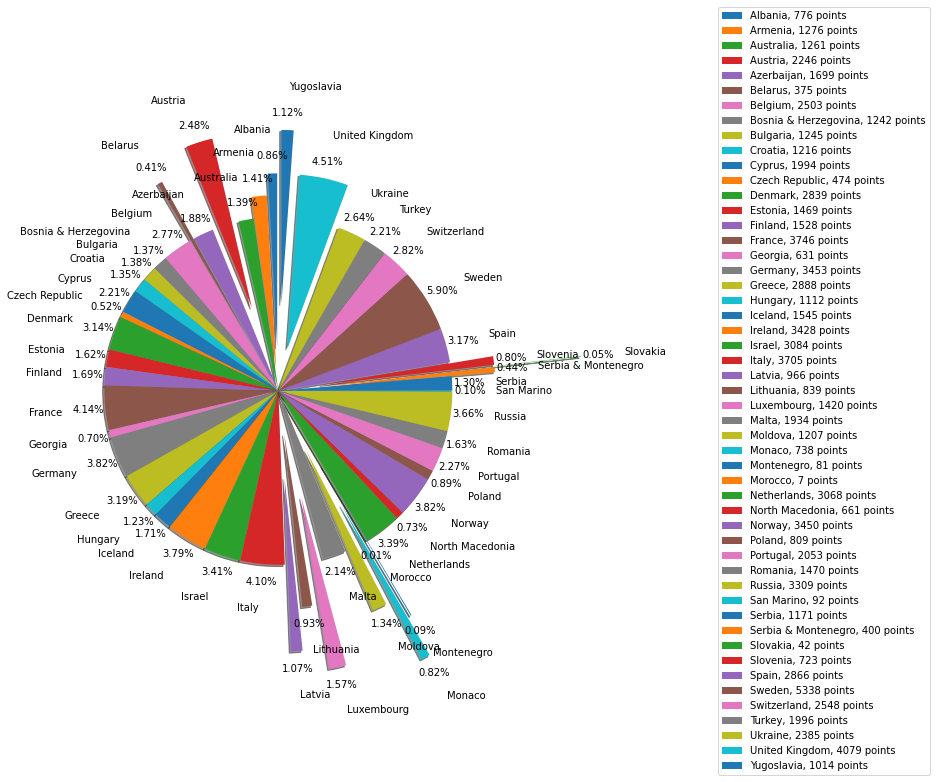

In [26]:
labels = countries_pie
sizes = points_pie['Points']
# len(points_pie['Points']) = 51
explode = ([0.5, 0.25, 0, 1, 0, 0.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.5, 1.25, 0, 0.75, 1.5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1.5, 0.5, 0, 0, 0, 0, 0, 0.5, 1])

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, radius=2, pctdistance=1.1, labeldistance=1.25)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

With 90.401 points total, Sweden's 5.338 points puts them at nearly 6% of all points distributed. Sweden is then followed by the United Kingdom (4,51%), France (4,14%), Italy (4,10%), Germany (3,82%), Norway (3,82%), and Ireland (3,79%).

#### How do different regions perform overall?

We are going to divide Europe into the regions
- <b>Northern Europe</b>: Estonia, Latvia, Lithuania, Denmark, Finland, Iceland, Norway, and Sweden.
- <b>Southern Europe</b>: Cyprus, Greece, Italy, Malta, Portugal, San Marino, Spain, and Turkey.
- <b>Central and Eastern Europe</b>: Albania, Belarus, Bosnia & Herzegovina, Bulgaria, Armenia, Azerbaijan, Georgia, Croatia, Czechia, Hungary, Moldova, Montenegro, North Macedonia, Poland, Romania, Russia, Serbia, Serbia and Montenegro (Yugoslavia), Slovakia, Slovenia, and Ukraine.
- <b>Western Europe</b>: Austria, Belgium, France, Germany, Ireland, Luxembourg, Monaco, the Netherlands, Switzerland, and the United Kingdom.

and Australia, Israel, and Morocco will fall under <b>Others</b>.

In [27]:
neurope = euro_points_overall.filter(
    (euro_points_overall['tCountry'] == 'Estonia') |
    (euro_points_overall['tCountry'] == 'Latvia') |
    (euro_points_overall['tCountry'] == 'Lithuania') |
    (euro_points_overall['tCountry'] == 'Denmark') |
    (euro_points_overall['tCountry'] == 'Finland') |
    (euro_points_overall['tCountry'] == 'Iceland') |
    (euro_points_overall['tCountry'] == 'Norway') |
    (euro_points_overall['tCountry'] == 'Sweden')
)

seurope = euro_points_overall.filter(
    (euro_points_overall['tCountry'] == 'Cyprus') |
    (euro_points_overall['tCountry'] == 'Greece') |
    (euro_points_overall['tCountry'] == 'Italy') |
    (euro_points_overall['tCountry'] == 'Malta') |
    (euro_points_overall['tCountry'] == 'Portugal') |
    (euro_points_overall['tCountry'] == 'San Marino') |
    (euro_points_overall['tCountry'] == 'Spain') |
    (euro_points_overall['tCountry'] == 'Turkey')
)

ceeurope = euro_points_overall.filter(
    (euro_points_overall['tCountry'] == 'Albania') |
    (euro_points_overall['tCountry'] == 'Belarus') |
    (euro_points_overall['tCountry'] == 'Bosnia & Herzegovina') |
    (euro_points_overall['tCountry'] == 'Bulgaria') |
    (euro_points_overall['tCountry'] == 'Armenia') |
    (euro_points_overall['tCountry'] == 'Azerbaijan') |
    (euro_points_overall['tCountry'] == 'Georgia') |
    (euro_points_overall['tCountry'] == 'Croatia') |
    (euro_points_overall['tCountry'] == 'Czech Republic') |
    (euro_points_overall['tCountry'] == 'Hungary') |
    (euro_points_overall['tCountry'] == 'Moldova') |
    (euro_points_overall['tCountry'] == 'Montenegro') |
    (euro_points_overall['tCountry'] == 'North Macedonia') |
    (euro_points_overall['tCountry'] == 'Poland') |
    (euro_points_overall['tCountry'] == 'Romania') |
    (euro_points_overall['tCountry'] == 'Russia') |
    (euro_points_overall['tCountry'] == 'Serbia') |
    (euro_points_overall['tCountry'] == 'Serbia & Montenegro') |
    (euro_points_overall['tCountry'] == 'Yugoslavia') |
    (euro_points_overall['tCountry'] == 'Slovakia') |
    (euro_points_overall['tCountry'] == 'Slovenia') |
    (euro_points_overall['tCountry'] == 'Ukraine')
)

weurope = euro_points_overall.filter(
    (euro_points_overall['tCountry'] == 'Austria') |
    (euro_points_overall['tCountry'] == 'Belgium') |
    (euro_points_overall['tCountry'] == 'France') |
    (euro_points_overall['tCountry'] == 'Germany') |
    (euro_points_overall['tCountry'] == 'Luxembourg') |
    (euro_points_overall['tCountry'] == 'Monaco') |
    (euro_points_overall['tCountry'] == 'Netherlands') |
    (euro_points_overall['tCountry'] == 'Switzerland') |
    (euro_points_overall['tCountry'] == 'United Kingdom')
)

others = euro_points_overall.filter(
    (euro_points_overall['tCountry'] == 'Australia') |
    (euro_points_overall['tCountry'] == 'Israel') |
    (euro_points_overall['tCountry'] == 'Morocco')
)

agg_pts = (neurope['Points'].sum(), seurope['Points'].sum(), ceeurope['Points'].sum(), weurope['Points'].sum(), others['Points'].sum())
print(agg_pts)

(17974, 17528, 23318, 23801, 4352)


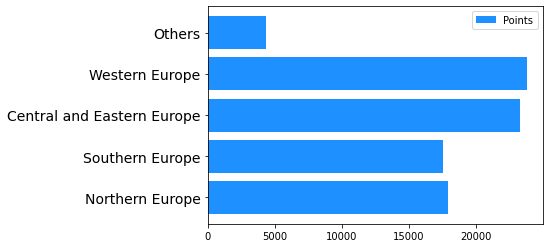

In [28]:
names = ('Northern Europe', 'Southern Europe', 'Central and Eastern Europe', 'Western Europe', 'Others')

plt.barh(np.arange(len(names)), agg_pts, label='Points', color='dodgerblue')
plt.yticks(range(0, len(names)), names, rotation='horizontal', size=14)

plt.legend()

plt.show()

This is most likely due to the sheer amount of countries falling under the <b>Central and Eastern Europe</b> category and Sweden carrying <b>Northern Europe</b>. Let's see if this is true.

#### What are the point averages for each region?

In [29]:
count_neurope = len(neurope)
count_seurope = len(seurope)
count_ceeurope = len(ceeurope)
count_weurope = len(weurope)
count_others = len(others)

avg_neurope = neurope['Points'].sum()/count_neurope
avg_seurope = seurope['Points'].sum()/count_seurope
avg_ceeurope = ceeurope['Points'].sum()/count_ceeurope
avg_weurope = weurope['Points'].sum()/count_weurope
avg_others = others['Points'].sum()/count_others

avg_pts = list(np.around(np.array([avg_neurope, avg_seurope, avg_ceeurope, avg_weurope, avg_others]), 2))
print(avg_pts)

[2246.75, 2191.0, 1059.91, 2644.56, 1450.67]


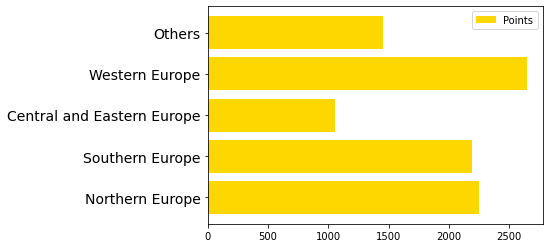

In [30]:
names = ('Northern Europe', 'Southern Europe', 'Central and Eastern Europe', 'Western Europe', 'Others')

plt.barh(np.arange(len(names)), avg_pts, label='Points', color='gold')
plt.yticks(range(0, len(names)), names, rotation='horizontal', size=14)

plt.legend()

plt.show()

It looks like the guess was right! <b>Central and Eastern Europe</b> just had more countries and <b>Northern Europe</b> was carried by Sweden.

#### Are there any regions where a country dominates?

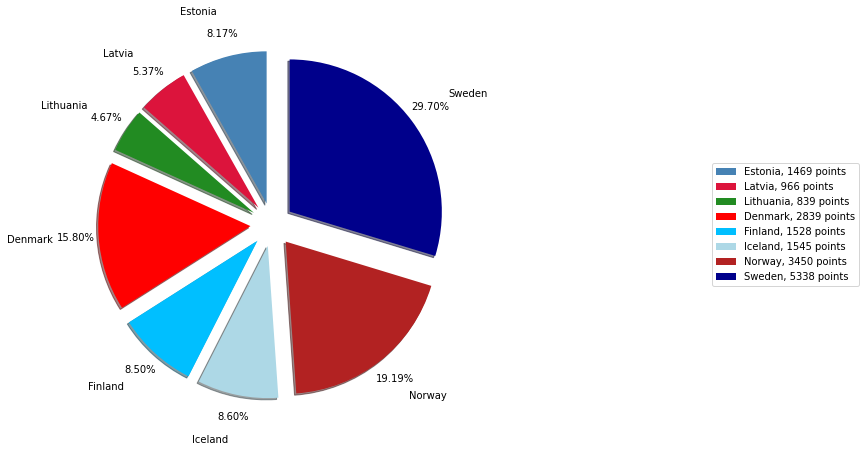

In [31]:
labels = ['Estonia', 'Latvia', 'Lithuania', 'Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']
sizes = [1469, 966, 839, 2839, 1528, 1545, 3450, 5338]
color_set = ['steelblue', 'crimson', 'forestgreen', 'red', 'deepskyblue', 'lightblue', 'firebrick', 'darkblue']

explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Sweden</b> commands northern Europe and has a massive lead over second-place <b>Norway</b>.

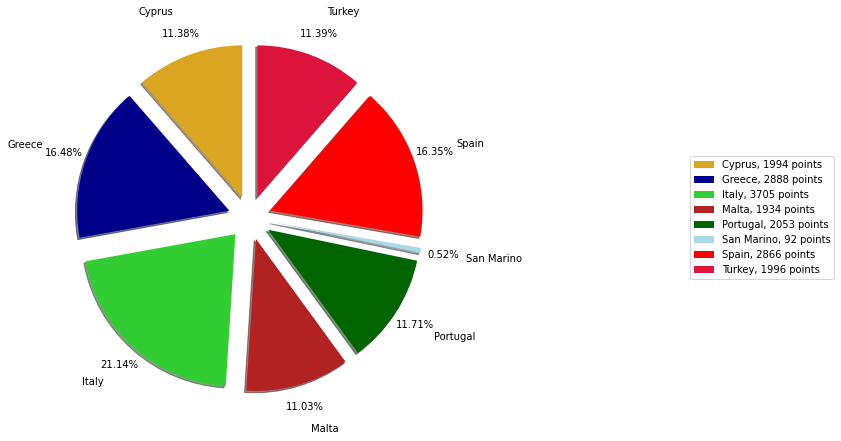

In [32]:
labels = ['Cyprus', 'Greece', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain', 'Turkey']
sizes = [1994, 2888, 3705, 1934, 2053, 92, 2866, 1996]
color_set = ['goldenrod', 'darkblue', 'limegreen', 'firebrick', 'darkgreen', 'lightblue', 'red', 'crimson']

explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

No country dominates southern Europe. The only country that jumps out is <b>San Marino</b> for their lack of points.

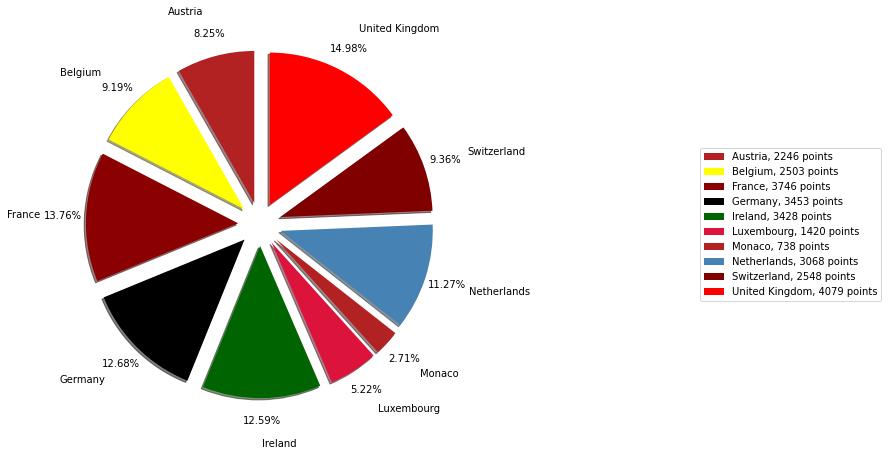

In [33]:
labels = ['Austria', 'Belgium', 'France', 'Germany', 'Ireland', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland', 'United Kingdom']
sizes = [2246, 2503, 3746, 3453, 3428, 1420, 738, 3068, 2548, 4079]
color_set = ['firebrick', 'yellow', 'darkred', 'black', 'darkgreen', 'crimson', 'firebrick', 'steelblue', 'maroon', 'red']

explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

No country also dominates western Europe either. The countries that jump out are <b>Monaco</b> and <b>Luxembourg</b> for their lack of points.

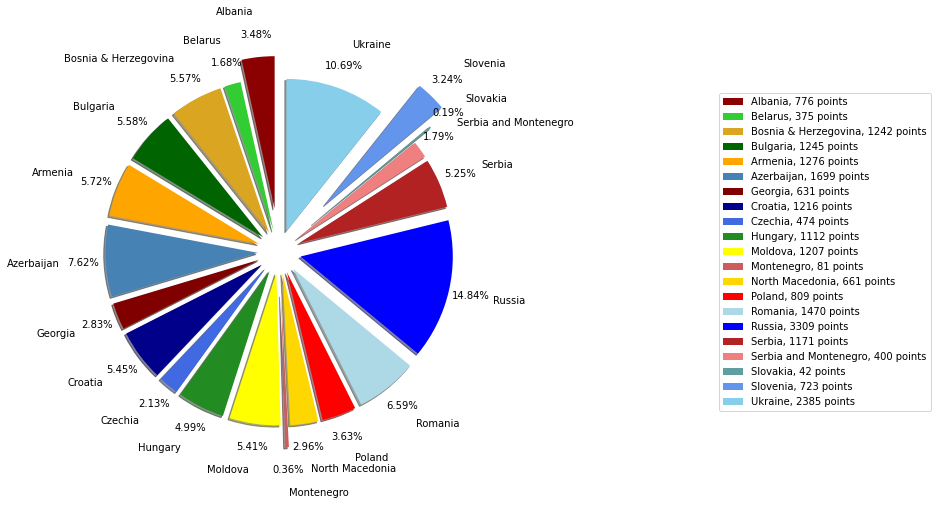

In [34]:
labels = ['Albania', 'Belarus', 'Bosnia & Herzegovina', 'Bulgaria', 'Armenia', 'Azerbaijan', 'Georgia', 'Croatia', 'Czechia', 'Hungary', 'Moldova', 'Montenegro', 'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Ukraine']
sizes = [776, 375, 1242, 1245, 1276, 1699, 631, 1216, 474, 1112, 1207, 81, 661, 809, 1470, 3309, 1171, 400, 42, 723, 2385]
color_set = ['darkred', 'limegreen', 'goldenrod', 'darkgreen', 'orange', 'steelblue', 'maroon', 'darkblue', 'royalblue', 'forestgreen', 'yellow', 'indianred', 'gold', 'red', 'lightblue', 'blue', 'firebrick', 'lightcoral', 'cadetblue', 'cornflowerblue', 'skyblue']

explode = (0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.75, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Russia</b> and <b>Ukraine</b> lead the way in central and eastern Europe, and most of everyone else except <b>Montenegro</b> and <b>Slovakia</b> are roughly level with each other.

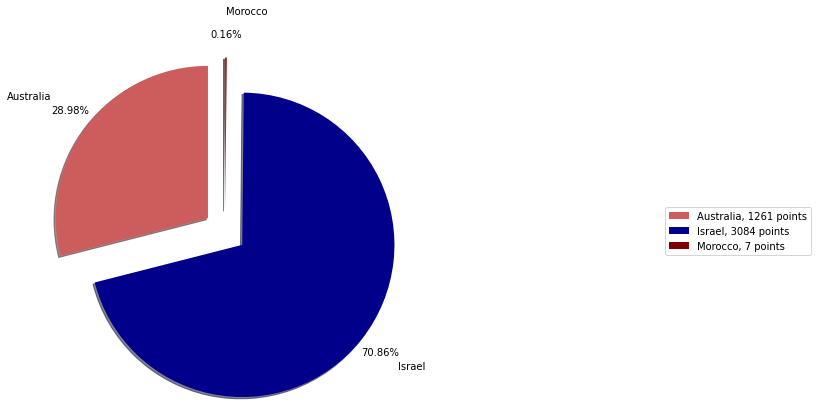

In [35]:
labels = ['Australia', 'Israel', 'Morocco']
sizes = [1261, 3084, 7]
color_set = ['indianred', 'darkblue', 'maroon']

explode = (0.25, 0.25, 0.25)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=1.75, pctdistance=1.15, labeldistance=1.3)
plt.legend(labels=['%s, %1.0f points' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

We finally got something! For all the other non-European participants, <b>Israel</b> is by far the most dominant country in this category.

#### Who are the winners for each year?

Let's build a table that include just years, countries, and points. 

In [36]:
finalpoints = eurovisionfinal.group_by(['Year', 'tCountry']).sum()['Year', 'tCountry', 'Points'].sort(['Year'], descending=False)
finalpoints = finalpoints.rename({'Points': 'Final Points'})

In [37]:
table = eurovisionfinal
table = table.join(finalpoints, on=['Year', 'tCountry'])
table

Year,(semi-) final,Edition,Jury or Televoting,fCountry,tCountry,Points,Duplicate,Decade,Century,Final Points
str,str,str,str,str,str,i64,str,str,str,i64
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Belgium""",0,"""x""","""1950""","""1900""",5
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Luxembourg""",0,null,"""1950""","""1900""",8
"""1957""","""f""","""1957f""","""J""","""Belgium""","""United Kingdom""",1,null,"""1950""","""1900""",6
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Italy""",1,null,"""1950""","""1900""",7
"""1957""","""f""","""1957f""","""J""","""Belgium""","""Austria""",0,null,"""1950""","""1900""",3
…,…,…,…,…,…,…,…,…,…,…
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Greece""",0,null,"""2010""","""2000""",71
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Germany""",8,null,"""2010""","""2000""",32
"""2019""","""f""","""2019f""","""J""","""Belarus""","""Belarus""",0,"""x""","""2010""","""2000""",38


Now deleting the extra columns.

In [38]:
table = table.drop('(semi-) final')
table = table.drop('Edition')
table = table.drop('Jury or Televoting')
table = table.drop('Points')
table = table.drop('Duplicate')
table = table.drop('Decade')
table = table.drop('Century')
table = table.drop('fCountry')
table

Year,tCountry,Final Points
str,str,i64
"""1957""","""Belgium""",5
"""1957""","""Luxembourg""",8
"""1957""","""United Kingdom""",6
"""1957""","""Italy""",7
"""1957""","""Austria""",3
…,…,…
"""2019""","""Greece""",71
"""2019""","""Germany""",32
"""2019""","""Belarus""",38


Now dropping the duplicates.

In [39]:
table = table.unique()
table = table.sort(['Year', 'Final Points'], descending=[False, True])
table

Year,tCountry,Final Points
str,str,i64
"""1957""","""Netherlands""",31
"""1957""","""France""",17
"""1957""","""Denmark""",10
"""1957""","""Germany""",8
"""1957""","""Luxembourg""",8
…,…,…
"""2019""","""Spain""",58
"""2019""","""Israel""",46
"""2019""","""Belarus""",38


With a cleaner table, we can pluck out the winners of each year by the country with the most amount of points.

In [40]:
max_points_table = table.with_columns(
    max_points = pl.col('Final Points').max().over('Year')
)

max_points_table = max_points_table.filter(
    pl.col('Final Points') == pl.col('max_points')
)

max_points_table = max_points_table.drop('max_points')
max_points_table[11:40]

Year,tCountry,Final Points
str,str,i64
"""1968""","""Spain""",29
"""1969""","""Spain""",18
"""1969""","""United Kingdom""",18
"""1969""","""Netherlands""",18
"""1969""","""France""",18
…,…,…
"""1989""","""Yugoslavia""",137
"""1990""","""Italy""",149
"""1991""","""France""",146


We need to make some changes to this table:
- 1956's competition did not publish the points, but the Swiss were the winners.
- <s>Spain was not the only winner in 1969 as it was a four-way tie at the top. France, the Netherlands, and the United Kingdom also shared the title.</s>
- <s>The winner of 1991's competition was actually Sweden, not France.</s>

While Polars fixed the problem Pandas had with handling the four-way tie in 1969, it failed to select Sweden over France in 1991 and left both records in. Manual adjustments are also needed for Switzerland being marked as the winner for 1956 contest.

In [41]:
add_switzerland = pl.DataFrame({'Year': '1956', 'tCountry': 'Switzerland', 'Final Points': 0})
Winners = max_points_table.extend(add_switzerland)
Winners = Winners.filter(
    ~((pl.col('Year') == '1991') & (pl.col('tCountry') == 'France'))
)
Winners = Winners.sort('Year')
Winners

Year,tCountry,Final Points
str,str,i64
"""1956""","""Switzerland""",0
"""1957""","""Netherlands""",31
"""1958""","""France""",27
"""1959""","""Netherlands""",21
"""1960""","""France""",32
…,…,…
"""2015""","""Sweden""",365
"""2016""","""Ukraine""",534
"""2017""","""Portugal""",758


This gives us a concise table of just years, countries, and points.

#### Who has won the most Eurovisions?

In [ ]:
Winners.group_by('tCountry').agg(pl.col('Year').count()).sort('Year', descending=True).head(10)

<b>Ireland</b>! The island country has topped the event seven times! They are followed by Sweden who has won it six times. Luxembourg, the Netherlands, and France have each won it five times. The United Kingdom and Israel have each won it four times. Denmark, Norway, and Spain have each won it three times.

<b>Ukraine</b> and four other countries have each won it twice, but given <b>Ukraine</b>'s recent entry, their two titles might make them the most impressive country of all participants.

#### Which years did Ireland win it and how many points did they get?

In [ ]:
Winners.filter(
    pl.col('tCountry') == 'Ireland'
)

<b>Ireland</b>'s victories span over three decades, but they have not won it again since 1996.

#### How does Ireland's 1994 victory compare to every other?

In [ ]:
Winners.sort('Final Points', descending=True).head(17)

Since the points assigned have increased, their victory in 1994 is only 17th ranked.

#### What was Ireland's winning percentage during each of their victories?

In [ ]:
ireland = {'year': [1970, 1980, 1987, 1992, 1993, 1994, 1996], 'pct': list(np.around(np.array([1/15, 2/25, 3/32, 4/37, 5/38, 6/39, 7/41]), 2))}
print(ireland['pct'])

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

plt.title('Ireland')
plt.plot(ireland['year'], ireland['pct'], label='Winning percentage', color='forestgreen')

plt.legend()

plt.show()

Defining <i>winning percentage</i> as the percentage of the total amount of wins in relative to the total amount of competitions, we see <b>Ireland</b>'s percentage jumped after they went back-to-back-to-back during the early 1990s. By their last win in 1996, <b>Ireland</b> accounted for over a sixth of all Eurovision wins.

<b>Ireland</b>'s current <i>winning percentage</i> is only about 10%.

#### Who else have been winning after the Irish?

In [ ]:
postireland = Winners.tail(23)
postireland.group_by('tCountry').agg(pl.col('Year').count()).sort('Year', descending=True)

In [ ]:
w_countries = [country for country in postireland['tCountry'].unique().sort(descending=False)]
wins = [win for win in postireland.group_by('tCountry').len().sort('tCountry', descending=False)['len']]

plt.figure(figsize=(14,8))

markerline, stemlines, baseline = plt.stem(sorted(w_countries), wins, linefmt='dodgerblue', markerfmt='D')
markerline.set_markerfacecolor('gold')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Wins')

plt.show()

<b>Sweden</b>! <b>Sweden</b> tops the list with three wins in the 23 years after Ireland's last win!

#### What is Sweden's winning percentage in the last 23 years?

In [ ]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25)
color_set=['firebrick', 'skyblue', 'red', 'royalblue', 'steelblue', 'black', 'darkblue', 'blue', 'maroon', 'lightblue', 'darkred', 'darkgreen', 'lightcoral', 'indianred', 'yellow', 'tomato', 'deepskyblue', 'rosybrown']

plt.pie(wins, labels=sorted(w_countries), explode=explode, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=0.8, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f win(s)' % (l, s) for l, s in zip(sorted(w_countries), wins)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Sweden</b>'s three wins in the 23 years gives them a <i>winning percentage</i> of 13%.

#### Who are the runners-up for each year?

In [ ]:
top_two_table = table.select(
    pl.all().top_k_by('Final Points', k=2).over('Year')
)

second_place_table = top_two_table.join(max_points_table, on=['Year', 'tCountry'], how='anti')
second_place_table[10:35]

We need to make some changes to this table:
- There was no runners-up in 1956.
- The runners-up for 1969 was actually Switzerland because of a four-way tie at the top.
- The runners-up for 1991 was France.

In [ ]:
add_switzerland_france = pl.DataFrame({'Year': ['1969', '1991'], 'tCountry': ['Switzerland', 'France'], 'Final Points': [13, 146]})
Runnersup = second_place_table.extend(add_switzerland_france)
Runnersup = Runnersup.sort('Year')
Runnersup[12:40]

This gives us another concise table of just runners-up.

#### Who has lost the most Eurovisions?

In [ ]:
Runnersup.group_by('tCountry').agg(pl.col('Year').count()).sort('Year', descending=True).head(10)

The <b>United Kingdom</b>! At a total of 16 (!) times, the <b>United Kingdom</b> takes pole position at finishing as runners-up. Germany, France, Russia, Spain, and Switerzland are in a distant second with each finishing as runners-up only four times.

#### Which years did the United Kingdom lose it and how many points did they get?

In [ ]:
Runnersup.filter(
    pl.col('tCountry') == 'United Kingdom'
)

The <b>United Kingdom</b>'s losses spanned five decades, and they have not made it back to the finals since 1998.

#### How does the United Kingdom's 1998 defeat compare to every other?

In [ ]:
Runnersup.sort('Final Points', descending=True).head(19)

Since the points assigned have increased, their defeat in 1998 is only 18th ranked.

#### What was the United Kingdom's losing percentage during each of their defeats?

In [ ]:
unitedkingdom = {'year': [1959, 1960, 1961, 1964, 1965, 1967, 1968, 1970, 1972, 1975, 1977, 1988, 1989, 1992, 1993, 1998], 'pct': list(np.around(np.array([1/4, 2/5, 3/6, 4/9, 5/10, 6/12, 7/13, 8/15, 9/17, 10/20, 11/22, 12/33, 13/34, 14/37, 15/38, 16/43]), 2))}
print(unitedkingdom['pct'])

In [ ]:
plt.figure(figsize=(14,8))

plt.title('United Kingdom')
plt.plot(unitedkingdom['year'], unitedkingdom['pct'], label='Losing percentage', color='red')

plt.legend()

plt.show()

Defining <i>losing percentage</i> as the percentage of the total amount of losses in relative to the total amount of competitions, we see the <b>United Kingdom</b>'s percentage peaked in 1968 when they lost four finals in five years. Their <i>losing percentage</i> would be at least 50% after half their losses.

The <b>United Kingdom</b>'s current <i>losing percentage</i> is only at 25%.

#### Who else have been losing after the British?

In [ ]:
postuk = Runnersup.tail(21)
postuk.group_by('tCountry').agg(pl.col('Year').count()).sort('Year', descending=True)

In [ ]:
l_countries = [country for country in postuk['tCountry'].unique().sort(descending=False)]
losses = [lose for lose in postuk.group_by('tCountry').len().sort('tCountry', descending=False)['len']]

plt.figure(figsize=(14,8))

markerline, stemlines, baseline = plt.stem(sorted(l_countries), losses, linefmt='dodgerblue', markerfmt='D')
markerline.set_markerfacecolor('gold')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Losses')

plt.show()

<b>Russia</b>! <b>Russia</b> tops the list with four losses in the 21 years after the United Kingdom's last loss!

#### What is Russia's losing percentage in the last 21 years?

In [ ]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25)
color_set = ['midnightblue', 'firebrick', 'yellow', 'forestgreen', 'gold', 'red', 'cornflowerblue', 'limegreen', 'maroon', 'darkblue', 'indianred', 'darkred', 'lightcoral', 'skyblue']

plt.pie(losses, labels=sorted(l_countries), explode=explode, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=0.8, labeldistance=1.1)
plt.legend(labels=['%s, %1.0f loss(es)' % (l, s) for l, s in zip(sorted(l_countries), losses)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

<b>Russia</b>'s four losses in the 21 years gives them a <i>losing percentage</i> of 19%.

#### How do the winners and runners-up compare in points differential?

Since we already have the tables for winners and runners-up, we can just combine them to form a new table.

In [ ]:
Winners = Winners.rename({'Final Points': 'wPoints'})
Runnersup = Runnersup.rename({'Final Points': 'rPoints'})
difference = Winners.join(Runnersup, on='Year')
difference

We need to make some changes to this table:
- <s>Points were not published in 1956, so that entry needs to be removed.</s>
- <s>The blank entries for 1969 are 13.</s>

Polars automatically took care of the issues from both 1956 and 1969 through joining as seen below.

In [ ]:
difference[10:20]

In [ ]:
difference = difference.with_columns((pl.col('wPoints')-pl.col('rPoints')).alias('Difference'))
difference = difference.drop('tCountry_right')
difference

In [ ]:
years = difference['Year'].to_list()
points_diff = difference['Difference'].to_list()

plt.figure(figsize=(14,8))

plt.title('Years')
plt.fill_between(np.arange(len(years)), points_diff, label='Points difference', color='darkslateblue')
plt.xticks(range(len(years)), years, rotation='vertical', size=12)

plt.legend()

plt.show()

<b>Norway</b>'s 2009 win by 169 points puts them at the top of the list, while <b>Sweden</b>'s 1991 win by 0 points is actually through a tiebreaker.

#### What is the breakdown of victories by point categories?

Defining <i>point category</i> by the tens, we are going to group the occurences of winning by 10+, 20+, 30+,... points.

In [ ]:
difference = difference.with_columns(
    (pl.col('Difference').floordiv(10)*10).alias('Category')
)
difference.head(17)

The last three 1969 entries are not going to be included because we want to count 1969 just once.

In [ ]:
point_category = difference.group_by('Category').len().sort('Category', descending=True)
point_category

In [ ]:
category = ['0+', '10+', '20+', '30+', '40+', '50+', '60+', '70+', '80+', '90+', '100+', '110+', '120+', '130+', '140+', '150+', '160+']
occurence = [20, 15, 4, 9, 5, 1, 3, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1]

plt.figure(figsize=(14,8))

markerline, stemlines, baseline = plt.stem(category, occurence, linefmt='dodgerblue', markerfmt='D')
markerline.set_markerfacecolor('gold')
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Breakdown')

plt.show()

The majority of victories came within 20 points, and the occurences greatly decrease as the point differentials increase. Outliers are effectively anything above 80+ points, and there are only four occurences.

#### What is the percentage of the point categories?

In [ ]:
labels = ['0+', '10+', '20+', '30+', '110+', '140+', '160+', '40+', '50+', '60+', '70+', '90+']
sizes = [20, 15, 5, 9, 1, 1, 1, 4, 1, 3, 2, 1]
explode = (0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, radius=2.5, pctdistance=1.1, labeldistance=1.2)
plt.legend(labels=['%s points, %1.0f times' % (l, s) for l, s in zip(labels, sizes)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

About a third are within 10 points, over half are within 20 points, and three-quarters are within 40 points of each other.

#### Who are the four outliers and who did they defeat?

In [ ]:
difference.filter(
    pl.col('Difference') >= 80
)

In [ ]:
Runnersup.filter(
    (pl.col('Year') == '2009') | (pl.col('Year') == '2012') | (pl.col('Year') == '2017') | (pl.col('Year') == '2018')
)

So <b>Norway</b> defeated <b>Iceland</b> in 2009, <b>Sweden</b> defeated <b>Russia</b> in 2012, <b>Portugal</b> defeated <b>Bulgaria</b> in 2017, and <b>Israel</b> defeated <b>Cyprus</b> in 2018.

#### Is there a pattern of assigning points in favour of other countries?

Do certain countries have more of an affinity towards other countries? Let's set up a new data frame and look at a few select countries.

In [ ]:
sweden_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Sweden'
)

sweden_giving_points = sweden_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
sweden_giving_points['tCountry', 'Points']

Looking just at <b>Sweden</b>, we see the Swedes having quite the affinity with their neighbours the Danes and the Norwegians, giving them 289 and 286 points respectively throughout the entirety of the history of the competition. Let's see if the feeling is mutual from the Danes and the Norwegians.

In [ ]:
denmark_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Denmark'
)

denmark_giving_points = denmark_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
denmark_giving_points['tCountry', 'Points']

In [ ]:
norway_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Norway'
)

norway_giving_points = norway_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
norway_giving_points['tCountry', 'Points']

It is! Both the Danes and the Norwegians give the Swedes back first and each other second!

#### Is there something similar in southern Europe?

In [ ]:
spain_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Spain'
)

spain_giving_points = spain_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
spain_giving_points['tCountry', 'Points']

In [ ]:
italy_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Italy'
)

italy_giving_points = italy_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
italy_giving_points['tCountry', 'Points']

In [ ]:
portugal_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Portugal'
)

portugal_giving_points = portugal_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
portugal_giving_points['tCountry', 'Points']

There is a bit of affinity there, but it is nowhere near as strong as the Scandinavians. <b>Portugal</b> has an affinity with <b>Spain</b> and <b>Italy</b>, and while <b>Spain</b> generally feels the same way, <b>Italy</b> prefers the British, the French, and the Irish more.

#### What about the Balkans?

In [ ]:
albania_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Albania'
)

albania_giving_points = albania_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
albania_giving_points['tCountry', 'Points']

In [ ]:
bosnia_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Bosnia & Herzegovina'
)

bosnia_giving_points = bosnia_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
bosnia_giving_points['tCountry', 'Points']

In [ ]:
croatia_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Croatia'
)

croatia_giving_points = croatia_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
croatia_giving_points['tCountry', 'Points']

In [ ]:
montenegro_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Montenegro'
)

montenegro_giving_points = montenegro_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
montenegro_giving_points['tCountry', 'Points']

In [ ]:
serbia_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Serbia'
)

serbia_giving_points = serbia_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
serbia_giving_points['tCountry', 'Points']

<b>Bosnia</b> and <b>Croatia</b> definitely have an affinity for each other, but the countries in the region generally give their points to their neighbours across other parts of central and eastern Europe.

#### How about the rest of central and eastern Europe?

In [ ]:
russia_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Russia'
)

russia_giving_points = russia_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
russia_giving_points['tCountry', 'Points']

In [ ]:
poland_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Poland'
)

poland_giving_points = poland_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
poland_giving_points['tCountry', 'Points']

In [ ]:
ukraine_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Ukraine'
)

ukraine_giving_points = ukraine_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
ukraine_giving_points['tCountry', 'Points']

In [ ]:
romania_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Romania'
)

romania_giving_points = romania_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
romania_giving_points['tCountry', 'Points']

In [ ]:
hungary_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Hungary'
)

hungary_giving_points = hungary_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
hungary_giving_points['tCountry', 'Points']

In [ ]:
bulgaria_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Bulgaria'
)

bulgaria_giving_points = bulgaria_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
bulgaria_giving_points['tCountry', 'Points']

The affinity is definitely very regional here as central and eastern European countries tend to have each other in their top fives.

#### How do the western Europeans feel about each other?

In [ ]:
france_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'France'
)

france_giving_points = france_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
france_giving_points['tCountry', 'Points']

In [ ]:
germany_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Germany'
)

germany_giving_points = germany_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
germany_giving_points['tCountry', 'Points']

In [ ]:
ireland_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Ireland'
)

ireland_giving_points = ireland_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
ireland_giving_points['tCountry', 'Points']

In [ ]:
netherlands_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Netherlands'
)

netherlands_giving_points = netherlands_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
netherlands_giving_points['tCountry', 'Points']

In [ ]:
belgium_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Belgium'
)

belgium_giving_points = belgium_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
belgium_giving_points['tCountry', 'Points']

In [ ]:
uk_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'United Kingdom'
)

uk_giving_points = uk_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
uk_giving_points['tCountry', 'Points']

Western European countries gift points all over the place, but there still exists the mutual affinities between the <b>United Kingdom-Ireland</b> and <b>The Netherlands-Belgium</b>.

#### How neutral are Austria and Switzerland here?

Did you know Switzerland is not the only country to declare permanent neutrality but also Austria as well? It is not that well known, but it is true! So is there a specific pattern to their points giving?

In [ ]:
switzerland_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Switzerland'
)

switzerland_giving_points = switzerland_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
switzerland_giving_points['tCountry', 'Points']

In [ ]:
austria_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Austria'
)

austria_giving_points = austria_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
austria_giving_points['tCountry', 'Points']

Both countries love <b>Sweden</b>, <b>Ireland</b>, and the <b>United Kingdom</b>, and they generally prefer their western and northern European neighbours.

#### What about the non-European participants?

In [ ]:
australia_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Australia'
)

australia_giving_points = australia_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
australia_giving_points['tCountry', 'Points']

In [ ]:
israel_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Israel'
)

israel_giving_points = israel_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
israel_giving_points['tCountry', 'Points']

In [ ]:
morocco_giving_points = eurovisiondata.filter(
    pl.col('fCountry') == 'Morocco'
)

morocco_giving_points = morocco_giving_points.group_by('tCountry').sum().sort('Points', descending=True).head(5)
morocco_giving_points['tCountry', 'Points']

<b>Sweden</b> is everywhere! Everyone just loves the Swedes, so much so that both <b>Australia</b> and <b>Israel</b> have <b>Sweden</b> at their top and <b>Morocco</b>'s only entrance have them gifting the Swedes some points as well.

#### What are the top 10 affinities between countries?

In [ ]:
affinities = eurovisiondata.group_by(['fCountry', 'tCountry']).sum().sort('Points', descending=True)
affinities['fCountry', 'tCountry', 'Points'].head(10)

<b>Best friends?</b> Cyprus and Greece! They have given each other 915 points throughout the entirety of this competition. <br>
<b>Best mates?</b> Denmark, Norway, and Sweden! Not only they take up 5 of the top 10 interactions, but they also have their neighbours Finland and Iceland also gifting Sweden.

#### How do the affinities breakdown by region?

If two countries belong to a same region, it will be registered as that region. If one is different than the other, it will be considered as <i>transregional</i>.

In [ ]:
agg_10_affinities = (7, 2, 0, 1, 0)

In [ ]:
names = ('Northern Europe', 'Southern Europe', 'Central and Eastern Europe', 'Western Europe', 'Transregional')

plt.barh(np.arange(len(names)), agg_10_affinities, label='Points', color='darkgoldenrod')
plt.yticks(range(0, len(names)), names, rotation='horizontal', size=14)

plt.legend()

plt.show()

In [ ]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25)
color_set = ['firebrick', 'mediumseagreen', 'palegoldenrod', 'steelblue', 'lightcyan']

plt.pie(agg_10_affinities, explode=explode, labels=names, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=1.15, labeldistance=1.27)
plt.legend(labels=['%s, %1.0f times' % (l, s) for l, s in zip(names, agg_10_affinities)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

The northern Europeans really love each other; they make up 70% of the top 10 affinities between countries.

#### What about the top 25 spots?

In [ ]:
affinities['fCountry', 'tCountry', 'Points'].head(25)

In [ ]:
agg_25_affinities = (9, 3, 4, 3, 6)

In [ ]:
explode = (0.25, 0.25, 0.25, 0.25, 0.25)
color_set = ['firebrick', 'mediumseagreen', 'palegoldenrod', 'steelblue', 'lightcyan']

plt.pie(agg_25_affinities, explode=explode, labels=names, autopct='%1.2f%%', colors=color_set, shadow=True, startangle=90, radius=2, pctdistance=1.15, labeldistance=1.27)
plt.legend(labels=['%s, %1.0f times' % (l, s) for l, s in zip(names, agg_25_affinities)], bbox_to_anchor=(2.5, 0.5), loc='center left')

plt.show()

Northern Europe is still in the lead, but of the six transregional affinities, <b>Sweden</b> appears in half of them.

## Credits

Special thanks to<br>
https://www.kaggle.com/proxyemailservices/eurovision-data-1957-to-1974
<br>
https://www.kaggle.com/datagraver/eurovision-song-contest-scores-19752019
<br>
for the datasets of the Eurovision Song Contest from 1956-2019.

Detailed background can be found here:
<br>
https://en.wikipedia.org/wiki/Eurovision_Song_Contest

Geographic definitions: <br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/911
<br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/912
<br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/913
<br>
https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://eurovoc.europa.eu/914
<br>
https://www.thoughtco.com/where-are-the-balkan-states-4070249